In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV com encoding latin1
contratos_df = pd.read_csv('ContratosEstMun.csv', delimiter=';', encoding='utf-8')

# Exibir as primeiras linhas do DataFrame para entender a estrutura
contratos_df.head()


/tmp/ipykernel_4079/1269698687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Tipo de Instrumento,N�mero Termo,N�mero (SIT),Benefici�rio,CPF/CNPJ,Situa��o,Data de Celebra��o,Repasse previsto,Valor Contrapartida
0,Termo de Fomento,23-003,60662,ASSOCIACAO DOS PROFISSIONAIS DE ARTE DE LONDRINA,08.968.721/0001-00,Em andamento,14/08/2023,"80.000,00","0,00"
1,Termo de Fomento,23-010,60663,ASSOCIACAO DOS PROFIS DA DANCA DE LONDRINA E R...,05.017.004/0001-04,Em andamento,14/08/2023,"100.000,00","0,00"
2,Termo de Fomento,25010/2023,61947,MMA - MINISTERIO DE MISSOES E ADORACAO INTERDE...,25.263.242/0001-07,Em andamento,20/11/2023,"80.000,00","0,00"
3,N�o enumerado,064,64,ASSOCIACAO DOS PROFISSIONAIS DE ARTE DE LONDRINA,08.968.721/0001-00,Em andamento,08/12/2023,"100.550,34","0,00"
4,N�o enumerado,47,47,PRODUTORA DO LESTE LTDA ME,14.464.562/0001-09,Em andamento,13/12/2023,"98.478,64","0,00"


In [4]:
import pandas as pd

# Carregar o arquivo CSV
contratos_df = pd.read_csv('ContratosEstMun.csv', encoding='latin1', delimiter=';')

# Função para converter valores monetários para float
def converter_valor(valor):
    try:
        # Substituir caracteres indesejados e converter para float
        return float(valor.replace('.', '').replace(',', '.'))
    except ValueError:
        return None

# Aplicar a função nas colunas 'Repasse previsto' e 'Valor Contrapartida'
contratos_df['Repasse previsto'] = contratos_df['Repasse previsto'].apply(converter_valor)
contratos_df['Valor Contrapartida'] = contratos_df['Valor Contrapartida'].apply(converter_valor)

# Calcular o valor total dos contratos e parcerias
valor_total_contratos = contratos_df['Valor Contrapartida'].sum()
valor_total_repasse_previsto = contratos_df['Repasse previsto'].sum()

print(f'Valor total dos contratos e parcerias: R${valor_total_contratos:,.2f}')
print(f'Valor total de repasse previsto: R${valor_total_repasse_previsto:,.2f}')


Valor total dos contratos e parcerias: R$24,905,470.10
Valor total de repasse previsto: R$120,079,878.62


(-1.0999999693263662,
 1.0999999158895823,
 -1.0999999121842932,
 1.0999999958182998)

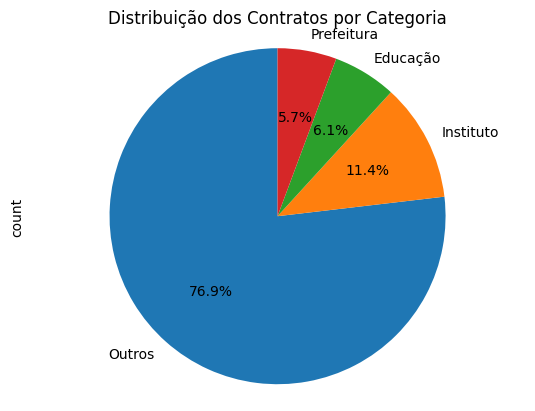

In [5]:
# Criar um dicionário para mapear as categorias desejadas
categorias_filtradas = {
    'Instituto': ['INSTITUTO'],
    'Associação': ['ASSOCIAÇÃO'],
    'Educação': ['EDUC'],
    'Prefeitura': ['PREFEITURA']
}

# Criar uma nova coluna 'Categoria' com base nas palavras-chave do dicionário
contratos_df['Categoria'] = 'Outros'  # Padrão para registros sem categoria
for categoria, palavras_chave in categorias_filtradas.items():
    contratos_df.loc[contratos_df['Beneficiï¿½rio'].str.upper().str.contains('|'.join(palavras_chave)), 'Categoria'] = categoria

# Contar a distribuição das categorias
categorias_count = contratos_df['Categoria'].value_counts()

# Criar um gráfico de pizza com as categorias filtradas
categorias_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição dos Contratos por Categoria')
plt.axis('equal')  


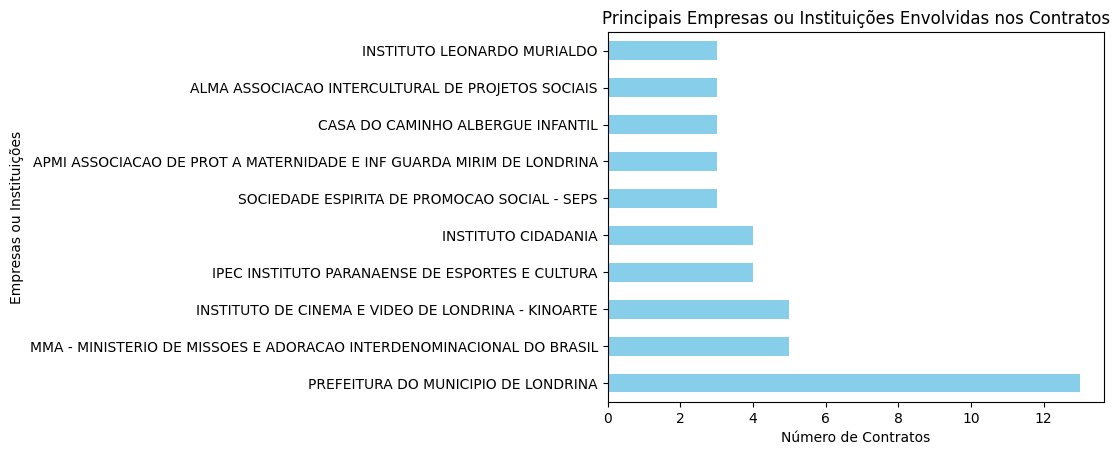

In [6]:
# Identificar as principais empresas ou instituições
top_empresas = contratos_df['Beneficiï¿½rio'].value_counts().head(10)
top_empresas.plot(kind='barh', color='skyblue')
plt.title('Principais Empresas ou Instituições Envolvidas nos Contratos')
plt.xlabel('Número de Contratos')
plt.ylabel('Empresas ou Instituições')
plt.show()